In [1]:
import pandas as pd
import copy
import requests
from tqdm.notebook import tqdm
from tqdm import tqdm
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By          # - 정보 획득
from selenium.webdriver.common.keys import Keys
# from engine_connect import create_engine_connect, db_connection
from sqlalchemy import create_engine
import os
import re
import time
from bs4 import BeautifulSoup
import warnings
import pymysql
import math
warnings.filterwarnings(action='ignore')
from selenium.webdriver.common.action_chains import ActionChains
import json


import time
import datetime as dt # 사용시 datetime.dt 로 사용 # 현재 시간 사용
from datetime import datetime # 사용시 함수로 바로 사용 #-> 시간 비교

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
plt.rcParams.update({'font.family': 'NanumBarunGothic'})

import scipy
import scipy.stats as stats
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [3]:
### 한글 폰트 설치
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

path = 'c:/Windows/Fonts/malgun.ttf'  # 또는 나눔고딕: 'c:/Windows/Fonts/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [4]:
directory = os.getcwd()
print("Current working directory : ", directory)

#수집날짜
folder_date = str(dt.datetime.now().date())
folder_date = re.sub("-", ".", folder_date)
today = re.sub("\.", "", folder_date)
print('오늘 날짜 : ', folder_date)

now = dt.datetime.now()
print('현재 시간 : ', now)

Current working directory :  C:\Develops\Competetion_Gangneung_vision_planning
오늘 날짜 :  2024.08.16
현재 시간 :  2024-08-16 20:22:03.727904


In [39]:
df_attraction = pd.read_excel(f"{directory}/data/df_attraction.xlsx")
df_destination_search = pd.read_excel(f"{directory}/data/df_destination_search.xlsx")
df_place_visitor = pd.read_excel(f"{directory}/data/df_place_visitor.xlsx")

## 데이터 확인

In [6]:
df_attraction

,순위,관광지명,주소,분류
0,1,경포해변,강원 강릉시,자연경관(하천/해양)
1,2,주문진항,강원 강릉시 해안로 1758-14,자연경관(하천/해양)
2,3,강릉중앙시장,강원 강릉시 금성로 21-0,시장
3,4,주문진수산시장,강원 강릉시 시장1길 4-1,시장
4,5,세인트존스호텔,강원 강릉시 창해로 307-0,호텔
...,...,...,...,...
195,96,에이제이호텔&펜션,강원 강릉시 경포로475번길 42-0,펜션/민박
196,97,파라다이스모텔,강원 강릉시 창해로 291-0,모텔
197,98,위너스호텔,강원 강릉시 해안로 1725-3,호텔
198,99,등명락가사,강원 강릉시 괘방산길 16-0,종교성지


In [7]:
df_destination_search

,기준연월,목적지 유형,목적지 검색량
0,202204,전체,481085
1,202207,전체,687062
2,202202,전체,482739
3,202206,전체,582784
4,202208,전체,872243
...,...,...,...
235,202312,음식,202766
236,202312,자연관광,66914
237,202312,역사관광,9779
238,202312,체험관광,734


In [8]:
df_place_visitor

,순위,광역지자체명,기초지자체명,관광지명,기준연월,입장객수,Unnamed: 6
0,1,강원특별자치도,강릉시,오죽헌.시립박물관,202201,53352,642737
1,1,강원특별자치도,강릉시,오죽헌.시립박물관,202202,48114,642737
2,1,강원특별자치도,강릉시,오죽헌.시립박물관,202203,24248,642737
3,1,강원특별자치도,강릉시,오죽헌.시립박물관,202204,47971,642737
4,1,강원특별자치도,강릉시,오죽헌.시립박물관,202205,65916,642737
...,...,...,...,...,...,...,...
475,20,강원특별자치도,강릉시,동양자수박물관,202308,372,3816
476,20,강원특별자치도,강릉시,동양자수박물관,202309,264,3816
477,20,강원특별자치도,강릉시,동양자수박물관,202310,362,3816
478,20,강원특별자치도,강릉시,동양자수박물관,202311,819,3816


## 데이터 탐색

### 1. 관광 명소 정보

In [40]:
df_attraction

,순위,관광지명,주소,분류
0,1,경포해변,강원 강릉시,자연경관(하천/해양)
1,2,주문진항,강원 강릉시 해안로 1758-14,자연경관(하천/해양)
2,3,강릉중앙시장,강원 강릉시 금성로 21-0,시장
3,4,주문진수산시장,강원 강릉시 시장1길 4-1,시장
4,5,세인트존스호텔,강원 강릉시 창해로 307-0,호텔
...,...,...,...,...
195,96,에이제이호텔&펜션,강원 강릉시 경포로475번길 42-0,펜션/민박
196,97,파라다이스모텔,강원 강릉시 창해로 291-0,모텔
197,98,위너스호텔,강원 강릉시 해안로 1725-3,호텔
198,99,등명락가사,강원 강릉시 괘방산길 16-0,종교성지


In [41]:
df_2022_attraction = df_attraction[:100] # 2022년 데이터
df_2022_attraction

,순위,관광지명,주소,분류
0,1,경포해변,강원 강릉시,자연경관(하천/해양)
1,2,주문진항,강원 강릉시 해안로 1758-14,자연경관(하천/해양)
2,3,강릉중앙시장,강원 강릉시 금성로 21-0,시장
3,4,주문진수산시장,강원 강릉시 시장1길 4-1,시장
4,5,세인트존스호텔,강원 강릉시 창해로 307-0,호텔
...,...,...,...,...
95,96,파라다이스모텔,강원 강릉시 창해로 291-0,모텔
96,97,한국여성수련원,강원 강릉시 금진솔밭길 148-19,육상레저스포츠
97,98,허균허난설헌기념관,강원 강릉시 난설헌로193번길 1-29,전시시설
98,99,염전해변,강원 강릉시,자연경관(하천/해양)


In [42]:
df_2023_attraction = df_attraction[100:200] # 2023년 데이터
df_2023_attraction

,순위,관광지명,주소,분류
100,1,강릉중앙시장,강원 강릉시 금성로 21-0,시장
101,2,주문진항,강원 강릉시 해안로 1758-14,자연경관(하천/해양)
102,3,세인트존스호텔,강원 강릉시 창해로 307-0,호텔
103,4,주문진수산시장,강원 강릉시 시장1길 4-1,시장
104,5,안목해변,강원 강릉시 창해로14번길 20-1,자연경관(하천/해양)
...,...,...,...,...
195,96,에이제이호텔&펜션,강원 강릉시 경포로475번길 42-0,펜션/민박
196,97,파라다이스모텔,강원 강릉시 창해로 291-0,모텔
197,98,위너스호텔,강원 강릉시 해안로 1725-3,호텔
198,99,등명락가사,강원 강릉시 괘방산길 16-0,종교성지


In [43]:
df_2022_attraction["분류"].value_counts().reset_index()[:10]

,분류,count
0,자연경관(하천/해양),27
1,호텔,16
2,교통시설,6
3,콘도미니엄,6
4,기타관광,4
5,육상레저스포츠,4
6,테마공원,4
7,시장,4
8,모텔,4
9,역사유적지,4


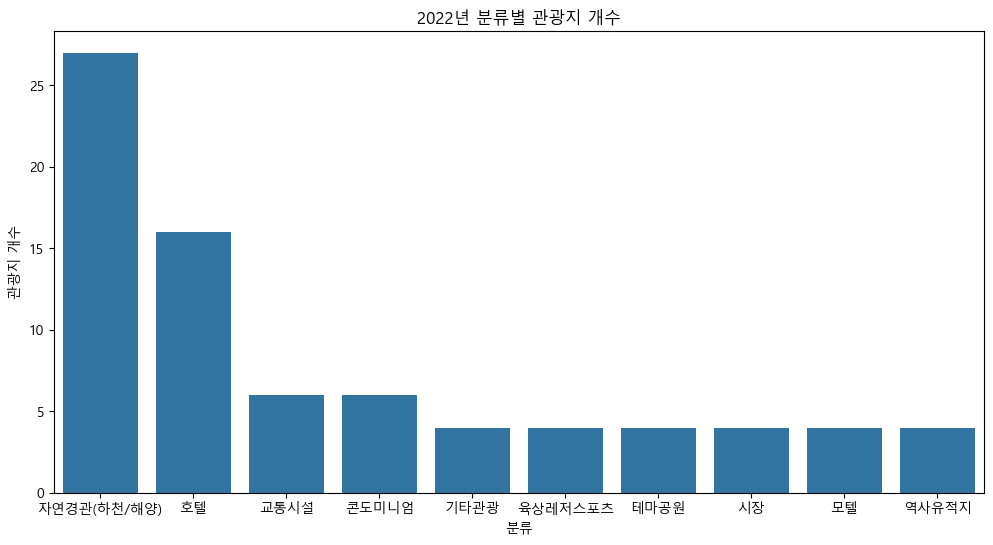

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_2022_attraction["분류"].value_counts().reset_index()[:10], x='분류', y='count')

# 그래프 제목 및 레이블 설정
plt.title('2022년 분류별 관광지 개수')
plt.xlabel('분류')
plt.ylabel('관광지 개수')
plt.show()

In [45]:
df_2023_attraction["분류"].value_counts().reset_index()[:10]

,분류,count
0,자연경관(하천/해양),24
1,호텔,16
2,교통시설,6
3,콘도미니엄,5
4,테마공원,5
5,시장,4
6,도시공원,4
7,역사유적지,4
8,기타관광,4
9,육상레저스포츠,4


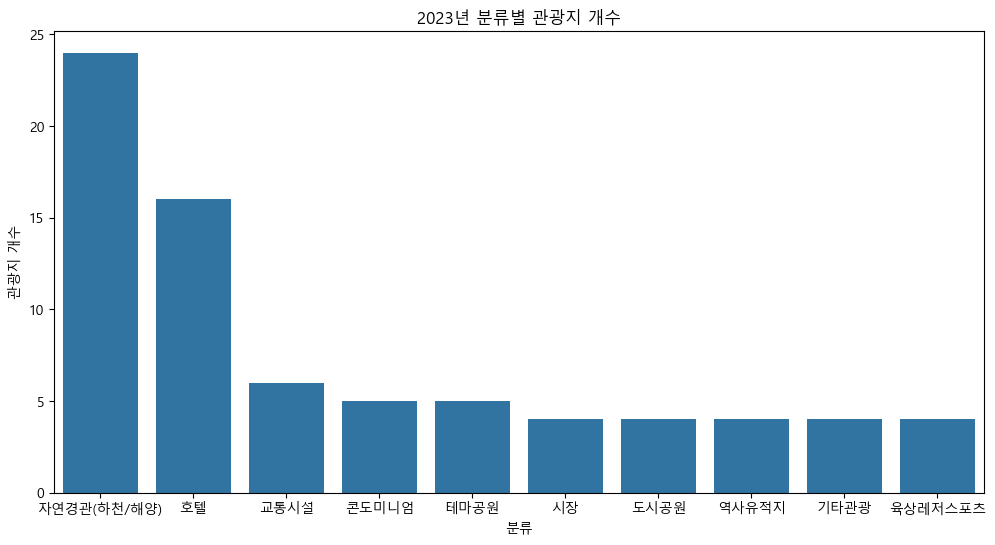

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_2023_attraction["분류"].value_counts().reset_index()[:10], x='분류', y='count')

# 그래프 제목 및 레이블 설정
plt.title('2023년 분류별 관광지 개수')
plt.xlabel('분류')
plt.ylabel('관광지 개수')
plt.show()

### 2. 목적지 검색량

In [47]:
df_destination_search

,기준연월,목적지 유형,목적지 검색량
0,202204,전체,481085
1,202207,전체,687062
2,202202,전체,482739
3,202206,전체,582784
4,202208,전체,872243
...,...,...,...
235,202312,음식,202766
236,202312,자연관광,66914
237,202312,역사관광,9779
238,202312,체험관광,734


In [48]:
df_destination_search = df_destination_search[df_destination_search['목적지 유형'] != '전체']
df_destination_search

,기준연월,목적지 유형,목적지 검색량
12,202204,숙박,84881
13,202204,음식,191142
14,202204,기타관광,25475
15,202204,문화관광,37481
16,202204,쇼핑,27662
...,...,...,...
235,202312,음식,202766
236,202312,자연관광,66914
237,202312,역사관광,9779
238,202312,체험관광,734


In [49]:
df_destination_search['연도'] = df_destination_search['기준연월'].astype(str).str[:4]
df_destination_search['월'] = df_destination_search['기준연월'].astype(str).str[4:6]
df_destination_search = df_destination_search.sort_values(by = "기준연월")
df_destination_search

,기준연월,목적지 유형,목적지 검색량,연도,월
57,202201,숙박,79468,2022,01
59,202201,기타관광,23014,2022,01
60,202201,문화관광,45259,2022,01
61,202201,쇼핑,36506,2022,01
62,202201,자연관광,85615,2022,01
...,...,...,...,...,...
234,202312,숙박,93855,2023,12
235,202312,음식,202766,2023,12
236,202312,자연관광,66914,2023,12
237,202312,역사관광,9779,2023,12


In [ ]:
그래프를 그려보자